<a href="https://colab.research.google.com/github/Niki-CM/CNN_Player_Classification_/blob/main/Copy_of_playerclassify1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Player Classification with CNN

In [ ]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [ ]:
classifier = Sequential()

In [ ]:
# Convolution
classifier.add(Conv2D(64, 5, 5, input_shape = (256, 256, 3), activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())

In [ ]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))


In [ ]:
# Adding a second convolutional layer
classifier.add(Conv2D(128, 5, 5, activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

In [ ]:
# Flattening
classifier.add(Flatten())

In [ ]:
# Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN for Player Classify/CNN/dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 209 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN for Player Classify/CNN/dataset/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 72 images belonging to 2 classes.


In [ ]:
! pip install livelossplot

In [ ]:
from livelossplot import PlotLossesKerasTF

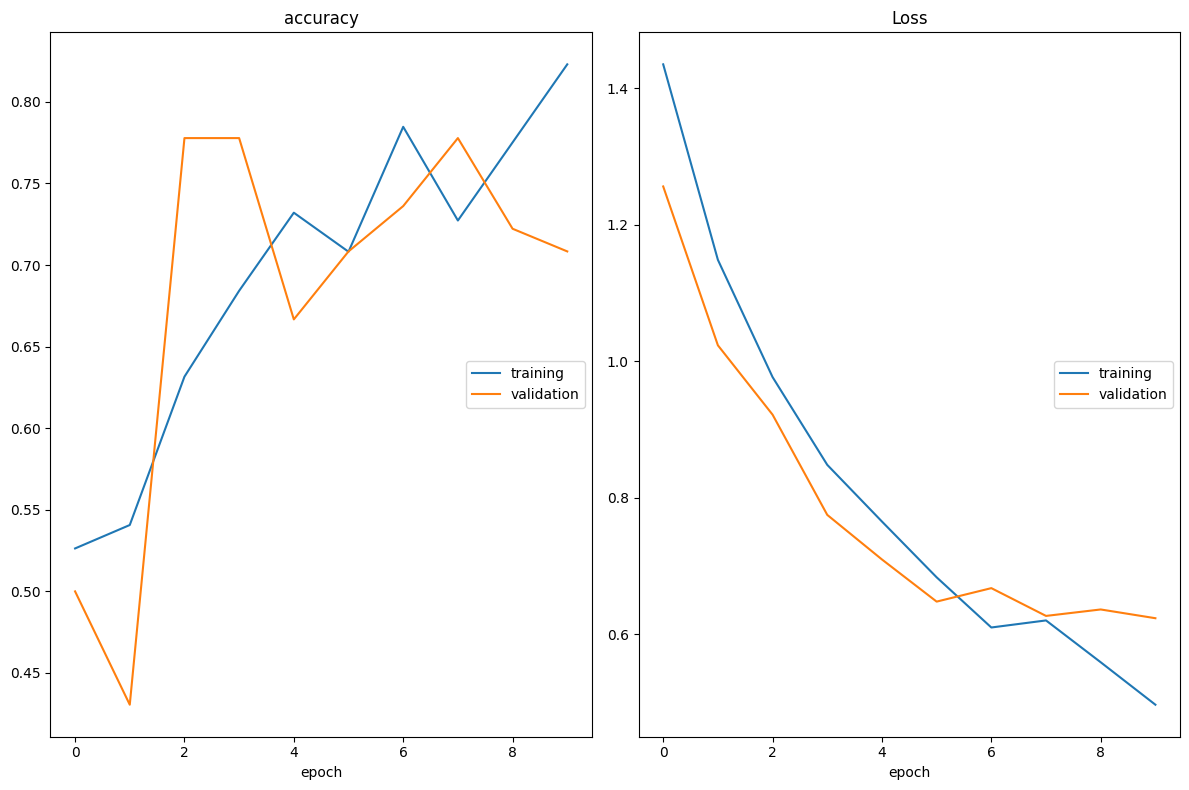

accuracy
	training         	 (min:    0.526, max:    0.823, cur:    0.823)
	validation       	 (min:    0.431, max:    0.778, cur:    0.708)
Loss
	training         	 (min:    0.497, max:    1.435, cur:    0.497)
	validation       	 (min:    0.624, max:    1.256, cur:    0.624)
14/14 [==============================] - 4s 293ms/step - loss: 0.4969 - accuracy: 0.8230 - val_loss: 0.6236 - val_accuracy: 0.7083


In [ ]:
classifier.fit(training_set,epochs=10,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


In [ ]:
classifier.save('/content/drive/MyDrive/CNN for Player Classify/CNN/Player.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/CNN for Player Classify/CNN/dataset/train/dhoni/d1.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 130ms/step
Result is 0.0
dhoni


In [ ]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN for Player Classify/CNN/dataset/train/kohli/dhoni_0_1106.jpeg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 39ms/step
Result is 1.0
kohli
